In [1]:
# SETUP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/4L4N4F/python-ML/refs/heads/main/data/rh_data.csv"
df = pd.read_csv(url)

print(df.shape)
print(df.head())
print(df.info())

(4410, 24)
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0         

In [2]:
# verificar nulos e duplicatas

if df.isnull().values.any():
    print("Há valores nulos no DataFrame.")
else:
    print("Não há valores nulos no DataFrame.")

if df.duplicated().any():
    print("Há linhas duplicadas no DataFrame.")
else:
    print("Não há linhas duplicadas no DataFrame.")


Há valores nulos no DataFrame.
Não há linhas duplicadas no DataFrame.


In [3]:
# encontrar nulos
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [4]:
# preencher nulos com a mediana
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median())
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median())
print(df.isna().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [5]:
# verificar valores de colunas possivelmente desnecessárias
print("EmployeeCount:", df['EmployeeCount'].unique())
print("Over18:", df['Over18'].unique())
print("StandardHours:", df['StandardHours'].unique())

EmployeeCount: [1]
Over18: ['Y']
StandardHours: [8]


In [6]:
# dropar colunas desnecessárias
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [7]:
# converter float para int
float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].astype(int)

In [8]:
# padronizar nomes das variáveis
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [9]:
# verificar range valores numéricos

num_cols = df.select_dtypes(include='int64').columns
for col in num_cols:
    print(f"{col}: {df[col].unique()}")



age: [51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]
distancefromhome: [ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]
education: [2 1 4 5 3]
employeeid: [   1    2    3 ... 4408 4409 4410]
joblevel: [1 4 3 2 5]
monthlyincome: [131160  41890 193280 ...  37020  23980  54680]
numcompaniesworked: [1 0 3 4 2 7 9 5 6 8]
percentsalaryhike: [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
stockoptionlevel: [0 1 3 2]
totalworkingyears: [ 1  6  5 13  9 28 10 21 16 37  7  3 15  8 12 17 19 22  2  4 23  0 11 24
 25 20 14 26 18 30 36 31 33 32 34 40 29 35 27 38]
trainingtimeslastyear: [6 3 2 5 4 0 1]
yearsatcompany: [ 1  5  8  6  7  0  9 20 15 36 10  3 17  2  4 11 22 18 13 24 21 16 25 29
 27 14 31 32 34 26 12 19 33 30 23 37 40]
yearssincelastpromotion: [ 0  1  7  4 10  9  6 11  3  5  2  8 13 12 15 14]
yearswithcurrmanager: [ 0  4  3  5  7  8 10 11 13  9  1  2  6 12 17 16 15 14]

In [10]:
# varificar valores inválidos

invalid_dict = {}

expected_ranges = {
    'age': (18, 65),
    'education': (1, 5),
    'joblevel': (1, 5),
    'percentsalaryhike': (0, 100),
    'numcompaniesworked': (0, 50),
    'totalworkingyears': (0, 60),
    'monthlyincome': (0, None),
    'distancefromhome': (0, None),
    'trainingtimeslastyear': (0, None),
    'yearsatcompany': (0, None),
    'yearssincelastpromotion': (0, None),
    'yearswithcurrmanager': (0, None),
    'stockoptionlevel': (0, 3)
}

for col in num_cols:


    if col in expected_ranges:
        lower, upper = expected_ranges[col]
        invalid_mask = pd.Series(False, index=df.index)
        if lower is not None:
            invalid_mask |= df[col] < lower
        if upper is not None:
            invalid_mask |= df[col] > upper
        invalid_dict[col] = invalid_mask.sum()
    else:
        invalid_dict[col] = 0


variable_report = pd.DataFrame({
    'invalid': [invalid_dict[c] for c in num_cols],
})

variable_report

,invalid
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Número de outliers em monthlyincome: 342
Exemplos de outliers: [193280, 193920, 196650, 168230, 171740, 178750, 191610, 196360, 194310, 188800]


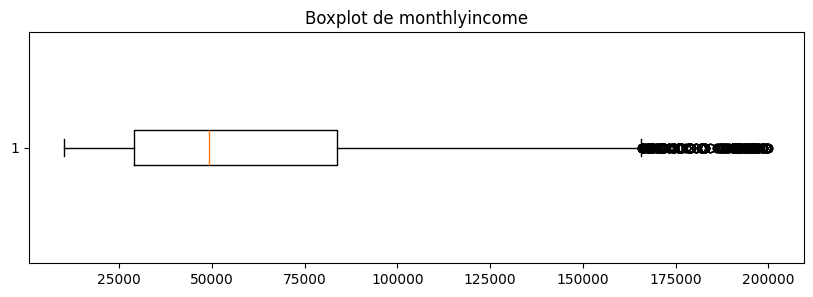

In [11]:
# buscar outliers com iqr (outras variáveis não fazia sentido usar iqr)

col = 'monthlyincome'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

print(f"Número de outliers em {col}: {len(outliers)}")
print(f"Exemplos de outliers: {outliers.tolist()[:10]}")

plt.figure(figsize=(10,3))
plt.boxplot(df[col], vert=False)
plt.title(f'Boxplot de {col}')
plt.show()

In [15]:
# FEATURE ENGENEERING

# versão log da variável de income (dependendo do tipo de modelo usado pode ser útil) porque os outliers são plausíveis

df['monthlyincome_log'] = np.log1p(df['monthlyincome'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4410 non-null   int64  
 1   attrition                4410 non-null   object 
 2   businesstravel           4410 non-null   object 
 3   department               4410 non-null   object 
 4   distancefromhome         4410 non-null   int64  
 5   education                4410 non-null   int64  
 6   educationfield           4410 non-null   object 
 7   employeeid               4410 non-null   int64  
 8   gender                   4410 non-null   object 
 9   joblevel                 4410 non-null   int64  
 10  jobrole                  4410 non-null   object 
 11  maritalstatus            4410 non-null   object 
 12  monthlyincome            4410 non-null   int64  
 13  numcompaniesworked       4410 non-null   int64  
 14  percentsalaryhike       

In [24]:
# senioridade x educação (pode sinalizar insatisfação ou mérito)
df['levelbyeducation'] = df['joblevel'] / df['education']

# tempo sem promoção (hipótese: longos períodos sem promoção aumentam risco de saída, 0 recém promovido, 1 nunca promovido)
df['timewithoutpromotion_rel'] = (df['yearssincelastpromotion'] / df['yearsatcompany']).clip(lower=0)

# faixa etária (hipótese: comportamento diferente no turnover por faixa etária)
bins_age = [17, 25, 35, 45, 55, np.inf]
labels_age = ['18-25', '26-35', '36-45', '46-55', '56+']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

# faixas de distância de casa (hipótese: mais distância mais insatisfação)
bins_dist = [-1, 5, 15, 25, np.inf]
labels_dist = ['muito_perto', 'perto', 'medio', 'longe']
df['distance_category'] = pd.cut(df['distancefromhome'], bins=bins_dist, labels=labels_dist)

print(df[['levelbyeducation', 'timewithoutpromotion_rel', 'age_group', 'distance_category']].head())
print(df[['levelbyeducation', 'timewithoutpromotion_rel']].describe())
print(df['age_group'].value_counts())
print(df['distance_category'].value_counts())



   levelbyeducation  timewithoutpromotion_rel age_group distance_category
0               0.5                     0.000     46-55             perto
1               1.0                     0.200     26-35             perto
2               1.0                     0.000     26-35             medio
3               0.6                     0.875     36-45       muito_perto
4               1.0                     0.000     26-35             perto
       levelbyeducation  timewithoutpromotion_rel
count       4410.000000               4278.000000
mean           0.842438                  0.299187
std            0.658511                  0.341759
min            0.200000                  0.000000
25%            0.400000                  0.000000
50%            0.666667                  0.174242
75%            1.000000                  0.500000
max            5.000000                  1.000000
age_group
26-35    1818
36-45    1404
46-55     678
18-25     369
56+       141
Name: count, dtype: int64


In [25]:
# ATUALIZAR DF
df.to_parquet('df_limpo.parquet', index=False)
from google.colab import files
files.download('df_limpo.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>